In [32]:
%matplotlib inline
import glymur
# from IPython.display import Image
import matplotlib.pyplot as plt
from pathlib import Path
from glob import glob
import numpy as np
import json, os
from glob import glob
from PIL import Image
from tqdm import tnrange, tqdm

In [33]:
config = json.load(open(os.path.expanduser("~/.thesis.conf")))
datasets_path = Path(config['datasets'])
db_folder = Path(config['datasets']) / 'hisdb'
modules   = Path(config['project']) / 'src'

%load_ext autoreload
%autoreload 2
import sys
sys.path.append(str(modules))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
import datasets.divahisdb as diva
dataset = diva.HisDBDataset(datasets_path / diva.NAME, gt=True)
page, gt = dataset[0]

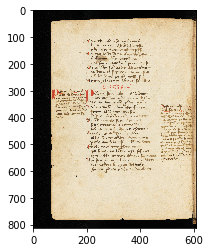

In [37]:
plt.imshow(np.array(page)[::8,::8])

In [39]:
import skimage.io
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float, img_as_ubyte
from skimage.transform import resize, rotate
from skimage import io
import matplotlib.pyplot as plt
import argparse
 
import random as rnd
import math

In [7]:
 # loop over the number of segments
# for numSegments in (200,201):
#     # apply SLIC and extract (approximately) the supplied number
#     # of segments
#     segments = slic(image, n_segments = numSegments, sigma = 5)

#     # show the output of SLIC
#     fig = plt.figure("Superpixels -- %d segments" % (numSegments))
#     ax = fig.add_subplot(1, 1, 1)
#     ax.imshow(mark_boundaries(image, segments,color=(0, 0, 0)))
#     plt.axis("off")

# show the plots
# plt.show()

In [16]:
scale = 2**-2
scaled = page.resize((int(page.width * scale), int(page.height * scale)))
image = img_as_float(np.array(scaled))
# scaled

In [17]:
math.sqrt(scaled.width * scaled.height / 3000)

25.677694600567243

In [18]:
patch = img_as_float(page.crop((700,700,1200,1200)))

In [40]:
segments = slic(image, n_segments = 3000)

In [42]:
segments

array([[   0,    0,    0, ...,   46,   46,   46],
       [   0,    0,    0, ...,   46,   46,   46],
       [   0,    0,    0, ...,   46,   46,   46],
       ...,
       [2306, 2306, 2306, ..., 2346, 2346, 2346],
       [2306, 2306, 2306, ..., 2346, 2346, 2346],
       [2306, 2306, 2306, ..., 2346, 2346, 2346]])

In [21]:
fig = plt.figure("Superpixels -- %d segments" % (numSegments))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(mark_boundaries(image, segments,color=(0, 0, 0)))
plt.axis("off")
plt.show()

NameError: name 'numSegments' is not defined

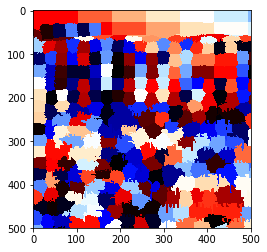

In [27]:
plt.imshow(segments[0:500,0:500],cmap='flag')

In [22]:
# patches = np.zeros((5, 28, 28, 3))
segments.dtype
segments

array([[   0,    0,    0, ...,   46,   46,   46],
       [   0,    0,    0, ...,   46,   46,   46],
       [   0,    0,    0, ...,   46,   46,   46],
       ...,
       [2306, 2306, 2306, ..., 2346, 2346, 2346],
       [2306, 2306, 2306, ..., 2346, 2346, 2346],
       [2306, 2306, 2306, ..., 2346, 2346, 2346]])

In [23]:
def img_offsets(directions=[0], width=28, jitter=7):
    """
    calculates offsets in the specified directions.
    Spacing is specified by width.
    Adds jitter
    """
    offsets = np.zeros((len(directions), 2))
    for idx, direction in enumerate(directions):
        print(direction)
        offset[idx] = [width * direction[0]  + rnd.randint(-jitter,jitter),
                       width * direction[1]  + rnd.randint(-jitter,jitter)]
    return offsets

In [46]:
from collections import namedtuple

In [123]:
patch_width = 28
rnd_offset = 7
nsegments = np.max(segments)
patches = np.zeros((nsegments, patch_width, patch_width, 3),dtype=image.dtype)
patch_meta = np.zeros((nsegments, 3), dtype=np.int32)
print(patches.shape)
def centered_patch(m, n, width, offset=[0,0]):
    return (slice(int(m + offset[0]),
                 int(m + offset[0] + width)),
           slice(int(n + offset[1] ),
                 int(n + offset[1] + width)))


SLICPixel = namedtuple('SLICPixel', ['x', 'y', 'width', 'height'])
Point = namedtuple('Point', ['x', 'y'])
# np.max(segments)
patch_count = 0

for snum in tqdm(range(0, nsegments)):
    spixel = np.where(segments == snum)
    mmin, nmin = list(map(min,spixel))
    mmax, nmax = list(map(max,spixel))
    
    spixel = SLICPixel(mmin, nmin, mmax - mmin, nmax - nmin) 
    center = Point(int(spixel.x + (spixel.width)/2) + 0.5, int(spixel.y + (spixel.height)/2 + 0.5))
    patch = SLICPixel(center.x - patch_width / 2, center.y - patch_width / 2, patch_width, patch_width)
    dimension  = mmax - mmin, nmax - nmin
    p = centered_patch(patch.x, patch.y, patch.width)
    img_patch = image[p]
    if img_patch.shape[0] == patch_width and img_patch.shape[1] == patch_width:
#         print(patch)
        patches[patch_count, :, :] = img_patch
        patch_meta[patch_count, :] = [center.x, center.y, snum]
        patch_count += 1
    

  0%|          | 11/2347 [00:00<00:22, 103.29it/s]

(2347, 28, 28, 3)


100%|██████████| 2347/2347 [00:22<00:00, 106.07it/s]


In [125]:
# prune
patchtes = patches[:patch_count]
patch_meta = patch_meta[:patch_count]

[1804 1805 1806 1807 1808 1809 1810 1811]
[1 1 1 1 1 1 1 1]


<Annotations.BACKGROUND: 1>

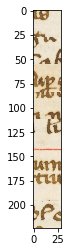

In [202]:
n = 1750
s = slice(n,n+8)
plt.imshow(np.concatenate(patches[s]))
print(patch_meta[s,2])
print(y[s])
diva.Annotations(y[s][1])

In [203]:
s + 8

TypeError: unsupported operand type(s) for +: 'slice' and 'int'

In [185]:
y = gt[np.round(patch_meta[:,0] / scale).astype(int), np.round(patch_meta[:,1] / scale).astype(int)]

In [186]:
# y = np.array([8])
masked = y & 0xFFFFF
encoding = np.zeros((len(masked), len(diva.Annotations)), dtype=np.ubyte)
for idx, anno in enumerate(diva.Annotations):
    encoding[:,idx] = (anno & masked).astype(bool).astype(np.ubyte)

In [187]:
encoding

array([[0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       ...,
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1]], dtype=uint8)

In [188]:
a = gt[1000:1050,1000:1050]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint32)

In [206]:
out = np.ones((image.shape[0], image.shape[1], 1), dtype=gt.dtype)
for x,y, snum in patch_meta[:10]:
    spixel = np.where(segments == snum)

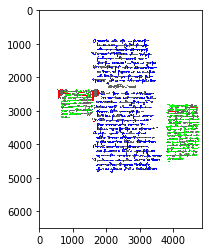

In [207]:
plt.imshow(diva.color_gt(gt))